In [2]:
import chollaread
import numpy as np
import yt
import trident
import matplotlib.pyplot as plt

In [3]:
import matplotlib.patches as mpatches

In [4]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/146.h5', cell_size_cgs = 10*chollaread.kpc/256)

yt : [INFO     ] 2021-11-03 13:27:45,082 Parameters: current_time              = 0.0
yt : [INFO     ] 2021-11-03 13:27:45,083 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2021-11-03 13:27:45,083 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-11-03 13:27:45,084 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22]
yt : [INFO     ] 2021-11-03 13:27:45,085 Parameters: cosmological_simulation   = 0.0


### Normal

In [1]:
def spec_all(x0, y0, z0, x, y, z, Ny, Nz, line_list, lmin, lmax):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    
    for i in range(Ny):
        for j in range(Nz):
        
            ray_start = np.array([x0,y0+(i*cu),z0+(j*cu)])*k
            ray_end = np.array([x,y+(i*cu),z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas')



            sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=0.01)
            sg.make_spectrum(ray, lines=[line_list])
            sg.save_spectrum('spec.txt')

            f = np.loadtxt('spec.txt')
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
        
  
    
    # Average Flux
    flux_list = []
    avg = []

    for n in range(Ny*Nz): # N = Ny * Nz     
        flux_ = arrays[n][1]
        flux_list.append(flux_) # Append flux to a list
        flux_arr = np.array(flux_list) # Turn list into an array
        flux_a = flux_arr.T # Transpose array
        
    for m in range(len(flux_a)):
        avg_ = np.average(flux_a[m])
        avg.append(avg_)
        
    #Plot
    fig = plt.figure(figsize=(15, 5))

    plt.plot(arrays[0][0], avg, color='black', label = "Average Spectrum", linewidth=1.75)
    plt.xlim(lmin, lmax)
    plt.title(line_list)
    plt.legend(fontsize='large')
    plt.xlabel('Wavelength')
    plt.ylabel('Relative Flux')

### Add Quasar

In [6]:
def spec_qred(x0, y0, z0, x, y, z, Ny, Nz, line_list, lmin, lmax, qred, title):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    for i in range(Ny):
        for j in range(Nz):
        
            ray_start = np.array([x0,y0+(i*cu),z0+(j*cu)])*k
            ray_end = np.array([x,y+(i*cu),z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas')



            sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=0.01)
            sg.make_spectrum(ray, lines=[line_list])
            sg.add_qso_spectrum(emitting_redshift=qred)
            sg.save_spectrum(title)

            f = np.loadtxt(title)
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
        
    
    # Average Flux
    flux_list = []
    avg = []

    for n in range(Ny*Nz): # N = Ny * Nz     
        flux_ = arrays[n][1]
        flux_list.append(flux_) # Append flux to a list
        flux_arr = np.array(flux_list) # Turn list into an array
        flux_a = flux_arr.T # Transpose array
        
    for m in range(len(flux_a)):
        avg_ = np.average(flux_a[m])
        avg.append(avg_)
        
 

    return arrays[0][0], avg

### Redshifted Ray

In [7]:
def spec_red(x0, y0, z0, x, y, z, Ny, Nz, line_list, lmin, lmax, red, title):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    for i in range(Ny):
        for j in range(Nz):
        
            ray_start = np.array([x0,y0+(i*cu),z0+(j*cu)])*k
            ray_end = np.array([x,y+(i*cu),z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas', redshift= red)



            sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=0.01)
            sg.make_spectrum(ray, lines=[line_list])
            sg.save_spectrum(title)

            f = np.loadtxt(title)
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
        
    
    # Average Flux
    flux_list = []
    avg = []

    for n in range(Ny*Nz): # N = Ny * Nz     
        flux_ = arrays[n][1]
        flux_list.append(flux_) # Append flux to a list
        flux_arr = np.array(flux_list) # Turn list into an array
        flux_a = flux_arr.T # Transpose array
        
    for m in range(len(flux_a)):
        avg_ = np.average(flux_a[m])
        avg.append(avg_)
        
 

    return arrays[0][0], avg

### Observing Redshift

In [36]:
def spec_obr(x0, y0, z0, x, y, z, Ny, Nz, line_list, lmin, lmax, red, title):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    for i in range(Ny):
        for j in range(Nz):
        
            ray_start = np.array([x0,y0+(i*cu),z0+(j*cu)])*k
            ray_end = np.array([x,y+(i*cu),z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas')



            sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=0.01)
            sg.make_spectrum(ray, lines=[line_list], observing_redshift= red)
            sg.save_spectrum(title)

            f = np.loadtxt(title)
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
        
    
    # Average Flux
    flux_list = []
    avg = []

    for n in range(Ny*Nz): # N = Ny * Nz     
        flux_ = arrays[n][1]
        flux_list.append(flux_) # Append flux to a list
        flux_arr = np.array(flux_list) # Turn list into an array
        flux_a = flux_arr.T # Transpose array
        
    for m in range(len(flux_a)):
        avg_ = np.average(flux_a[m])
        avg.append(avg_)
        
 

    return arrays[0][0], avg

### Both

In [59]:
def spec_both(x0, y0, z0, x, y, z, Ny, Nz, line_list, lmin, lmax, red, title):
        
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    for i in range(Ny):
        for j in range(Nz):
        
            ray_start = np.array([x0,y0+(i*cu),z0+(j*cu)])*k
            ray_end = np.array([x,y+(i*cu),z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas', redshift=red)



            sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=0.01)
            sg.make_spectrum(ray, lines=[line_list], observing_redshift= red)
            sg.save_spectrum(title)

            f = np.loadtxt(title)
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
        
    
    # Average Flux
    flux_list = []
    avg = []

    for n in range(Ny*Nz): # N = Ny * Nz     
        flux_ = arrays[n][1]
        flux_list.append(flux_) # Append flux to a list
        flux_arr = np.array(flux_list) # Turn list into an array
        flux_a = flux_arr.T # Transpose array
        
    for m in range(len(flux_a)):
        avg_ = np.average(flux_a[m])
        avg.append(avg_)
        
 

    return arrays[0][0], avg

### Gaussian Noise

In [37]:
def spec_noise(x0, y0, z0, x, y, z, Ny, Nz, line_list, lmin, lmax, noise, title):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    for i in range(Ny):
        for j in range(Nz):
        
            ray_start = np.array([x0,y0+(i*cu),z0+(j*cu)])*k
            ray_end = np.array([x,y+(i*cu),z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas')



            sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=0.01)
            sg.make_spectrum(ray, lines=[line_list])
            sg.add_gaussian_noise(noise)
            sg.save_spectrum(title)

            f = np.loadtxt(title)
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
        
    
    # Average Flux
    flux_list = []
    avg = []

    for n in range(Ny*Nz): # N = Ny * Nz     
        flux_ = arrays[n][1]
        flux_list.append(flux_) # Append flux to a list
        flux_arr = np.array(flux_list) # Turn list into an array
        flux_a = flux_arr.T # Transpose array
        
    for m in range(len(flux_a)):
        avg_ = np.average(flux_a[m])
        avg.append(avg_)

    return arrays[0][0], avg

### Add Milky Way

In [38]:
def spec_mw(x0, y0, z0, x, y, z, Ny, Nz, line_list, lmin, lmax ):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    for i in range(Ny):
        for j in range(Nz):
        
            ray_start = np.array([x0,y0+(i*cu),z0+(j*cu)])*k
            ray_end = np.array([x,y+(i*cu),z+(j*cu)])*k

            ray = trident.make_simple_ray(ds,
                                         start_position=ray_start,
                                         end_position=ray_end,
                                         data_filename= 'ray.h5',
                                         lines='all',
                                         ftype='gas')



            sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=0.01)
            sg.make_spectrum(ray, lines=[line_list])
            sg.add_milky_way_foreground()
            sg.save_spectrum('spec.txt')

            f = np.loadtxt('spec.txt')
            lam = f[:,0] # All rows, 1st column
            flux = f[:,2]

            tog = np.array([lam, flux])
            arrays.append(tog)
        
    
    # Average Flux
    flux_list = []
    avg = []

    for n in range(Ny*Nz): # N = Ny * Nz     
        flux_ = arrays[n][1]
        flux_list.append(flux_) # Append flux to a list
        flux_arr = np.array(flux_list) # Turn list into an array
        flux_a = flux_arr.T # Transpose array
        
    for m in range(len(flux_a)):
        avg_ = np.average(flux_a[m])
        avg.append(avg_)
        
    fig = plt.figure(figsize=(15, 5))

    plt.plot(arrays[0][0], avg, color='black', label = "Average Spectrum", linewidth=1.75)
    plt.xlim(lmin, lmax)
    plt.title(line_list)
    plt.legend(fontsize='large')
    plt.xlabel('Wavelength')
    plt.ylabel('Relative Flux')

# C IV 

### Normal

yt : [INFO     ] 2021-10-29 13:01:58,601 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-10-29 13:01:58,612 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2021-10-29 13:01:59,874 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 13:02:00,048 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 13:02:00,049 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 13:02:00,049 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 13:02:00,051 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_leng

yt : [INFO     ] 2021-10-29 13:02:14,713 Getting segment at z = 0.0: [0.         0.32890625 0.25195312] unitary to [1.         0.32890625 0.25195312] unitary.
yt : [INFO     ] 2021-10-29 13:02:14,714 Getting subsegment: [0.0 unitary, 0.32890625 unitary, 0.251953125 unitary] to [1.0 unitary, 0.32890625 unitary, 0.251953125 unitary].
yt : [INFO     ] 2021-10-29 13:02:15,940 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 13:02:16,080 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 13:02:16,080 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 13:02:16,081 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 13:02:16,082 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_length
yt : [INFO     ] 2021-10-29 13:02:16,084 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 13:02:16,087 Setting instrument to Custom
yt : [INFO   

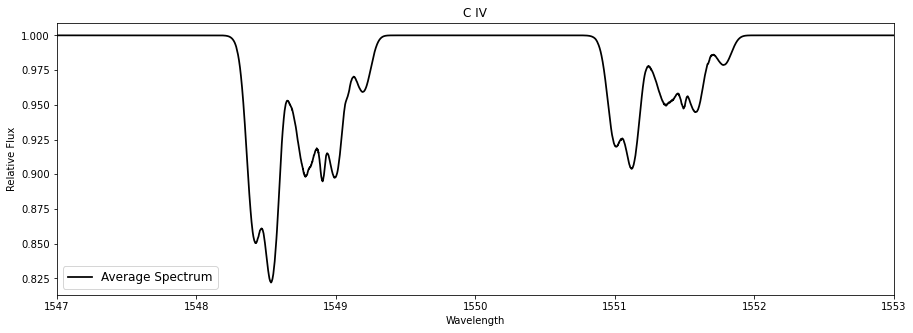

In [11]:
spec_all(0, .65, .5, 2, .65, .5, 4, 2, 'C IV', 1547, 1553)

### Quasar

In [16]:
z0 = spec_qred(0, .65, .5, 2, .65, .5, 4, 2, 'C IV', 1390, 1700, 0.2, 'spec.txt')
z1 = spec_qred(0, .65, .5, 2, .65, .5, 4, 2, 'C IV', 1390, 1700, 0.23, 'spec1.txt')
z2 = spec_qred(0, .65, .5, 2, .65, .5, 4, 2, 'C IV', 1390, 1700, 0.26, 'spec2.txt')
z3 = spec_qred(0, .65, .5, 2, .65, .5, 4, 2, 'C IV', 1390, 1700, 0.29, 'spec3.txt')

yt : [INFO     ] 2021-10-29 13:13:33,572 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-10-29 13:13:33,577 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2021-10-29 13:13:35,081 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 13:13:35,206 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 13:13:35,207 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 13:13:35,208 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 13:13:35,209 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_leng

yt : [INFO     ] 2021-10-29 13:14:07,528 Getting segment at z = 0.0: [0.         0.32890625 0.25195312] unitary to [1.         0.32890625 0.25195312] unitary.
yt : [INFO     ] 2021-10-29 13:14:07,530 Getting subsegment: [0.0 unitary, 0.32890625 unitary, 0.251953125 unitary] to [1.0 unitary, 0.32890625 unitary, 0.251953125 unitary].
yt : [INFO     ] 2021-10-29 13:14:08,690 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 13:14:08,814 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 13:14:08,815 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 13:14:08,816 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 13:14:08,816 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_length
yt : [INFO     ] 2021-10-29 13:14:08,818 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 13:14:08,820 Setting instrument to Custom
yt : [INFO   

yt : [INFO     ] 2021-10-29 13:14:46,544 Getting subsegment: [0.0 unitary, 0.326953125 unitary, 0.25 unitary] to [1.0 unitary, 0.326953125 unitary, 0.25 unitary].
yt : [INFO     ] 2021-10-29 13:14:47,798 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 13:14:47,938 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 13:14:47,939 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 13:14:47,940 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 13:14:47,941 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_length
yt : [INFO     ] 2021-10-29 13:14:47,942 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 13:14:47,945 Setting instrument to Custom
yt : [INFO     ] 2021-10-29 13:14:47,966 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-10-29 13:14:47,972 Identified 2.490e+02 octs
yt : [INFO   

yt : [INFO     ] 2021-10-29 13:15:26,859 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 13:15:26,997 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 13:15:26,998 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 13:15:26,998 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 13:15:26,999 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_length
yt : [INFO     ] 2021-10-29 13:15:27,001 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 13:15:27,004 Setting instrument to Custom
yt : [INFO     ] 2021-10-29 13:15:27,021 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-10-29 13:15:27,030 Identified 2.490e+02 octs
yt : [INFO     ] 2021-10-29 13:15:27,194 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-10-29 13:15:27,202 Creating spectrum
A

yt : [INFO     ] 2021-10-29 13:16:03,997 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 13:16:03,999 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_length
yt : [INFO     ] 2021-10-29 13:16:04,002 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 13:16:04,004 Setting instrument to Custom
yt : [INFO     ] 2021-10-29 13:16:04,021 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-10-29 13:16:04,029 Identified 2.490e+02 octs
yt : [INFO     ] 2021-10-29 13:16:04,194 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-10-29 13:16:04,206 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2326.77it/s]
yt : [INFO     ] 2021-10-29 13:16:04,744 Writing spectrum to ascii file: spec2.txt.
yt : [INFO     ] 2021-10-29 13:16:09,194 Getting segment at z = 0.0: [0.         0.32890

yt : [INFO     ] 2021-10-29 13:16:40,172 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 13:16:40,175 Setting instrument to Custom
yt : [INFO     ] 2021-10-29 13:16:40,193 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-10-29 13:16:40,200 Identified 2.490e+02 octs
yt : [INFO     ] 2021-10-29 13:16:40,433 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-10-29 13:16:40,441 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2306.19it/s]
yt : [INFO     ] 2021-10-29 13:16:41,001 Writing spectrum to ascii file: spec3.txt.
yt : [INFO     ] 2021-10-29 13:16:45,884 Getting segment at z = 0.0: [0.         0.32695313 0.25      ] unitary to [1.         0.32695313 0.25      ] unitary.
yt : [INFO     ] 2021-10-29 13:16:45,886 Getting subsegment: [0.0 unitary, 0.326953125 unitary, 0.25 unitary] to [1.0 unitary, 0.326953125 unitary, 0.25 unitary]

yt : [INFO     ] 2021-10-29 13:17:13,836 Identified 2.490e+02 octs
yt : [INFO     ] 2021-10-29 13:17:13,985 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-10-29 13:17:13,994 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1954.40it/s]
yt : [INFO     ] 2021-10-29 13:17:14,599 Writing spectrum to ascii file: spec3.txt.
yt : [INFO     ] 2021-10-29 13:17:19,141 Getting segment at z = 0.0: [0.         0.33085938 0.25195312] unitary to [1.         0.33085938 0.25195312] unitary.
yt : [INFO     ] 2021-10-29 13:17:19,143 Getting subsegment: [0.0 unitary, 0.33085937500000007 unitary, 0.251953125 unitary] to [1.0 unitary, 0.33085937500000007 unitary, 0.251953125 unitary].
yt : [INFO     ] 2021-10-29 13:17:20,375 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 13:17:20,510 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 13:17:20,510 Parameter

Text(0, 0.5, 'Relative Flux')

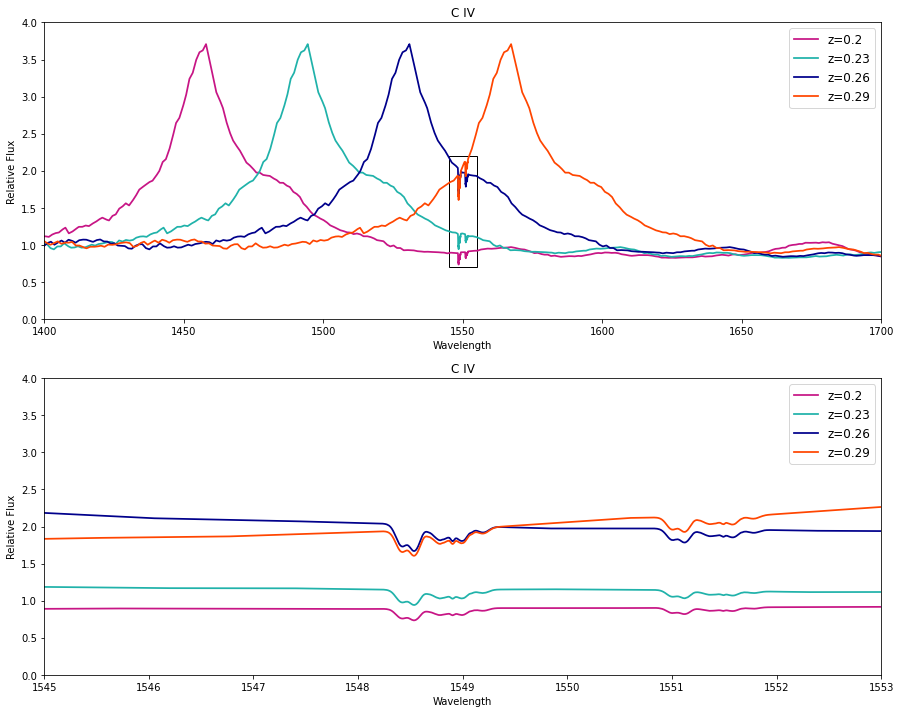

In [57]:
fig = plt.figure(figsize=(15, 12))

p1 = fig.add_subplot(2,1,1)
plt.plot(z0[0], z0[1], color='mediumvioletred', label = "z=0.2", linewidth=1.75)
plt.plot(z1[0], z1[1], color='lightseagreen', label = "z=0.23", linewidth=1.75)
plt.plot(z2[0], z2[1], color='darkblue', label = "z=0.26", linewidth=1.75)
plt.plot(z3[0], z3[1], color='orangered', label = "z=0.29", linewidth=1.75)
p1.add_patch(mpatches.Rectangle((1545, 0.7), 10, 1.5, color='black', fill=False))
plt.xlim(1400, 1700)
plt.title('C IV')
plt.legend(fontsize='large')
plt.ylim(0, 4)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')


p2 = fig.add_subplot(2,1,2)
plt.plot(z0[0], z0[1], color='mediumvioletred', label = "z=0.2", linewidth=1.75)
plt.plot(z1[0], z1[1], color='lightseagreen', label = "z=0.23", linewidth=1.75)
plt.plot(z2[0], z2[1], color='darkblue', label = "z=0.26", linewidth=1.75)
plt.plot(z3[0], z3[1], color='orangered', label = "z=0.29", linewidth=1.75)
plt.xlim(1545, 1553)
plt.title('C IV')
plt.legend(fontsize='large')
plt.ylim(0, 4)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

### Redshifted Ray

In [39]:
r0 = spec_red(0, .65, .5, 2, .65, .5, 4, 2, 'C IV', 1000, 3000, 0, 'spec.txt')
r1 = spec_red(0, .65, .5, 2, .65, .5, 4, 2, 'C IV', 1000, 3000, 0.2, 'spec1.txt')
r2 = spec_red(0, .65, .5, 2, .65, .5, 4, 2, 'C IV', 1000, 3000, 0.3, 'spec2.txt')
r3 = spec_red(0, .65, .5, 2, .65, .5, 4, 2, 'C IV', 1000, 3000, 0.5, 'spec3.txt')

yt : [INFO     ] 2021-10-29 13:46:08,661 Getting segment at z = 0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
yt : [INFO     ] 2021-10-29 13:46:08,664 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2021-10-29 13:46:10,611 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 13:46:10,735 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 13:46:10,735 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 13:46:10,736 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 13:46:10,737 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_length
yt : [INFO     ] 2021-10-29 13:46:10,739 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 13:46:10,741 Setting instrument to Custom
yt : [INFO     ] 2021-10-29 13:46:10,759 

yt : [INFO     ] 2021-10-29 13:46:37,371 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 13:46:37,495 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 13:46:37,496 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 13:46:37,496 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 13:46:37,497 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_length
yt : [INFO     ] 2021-10-29 13:46:37,499 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 13:46:37,501 Setting instrument to Custom
yt : [INFO     ] 2021-10-29 13:46:37,516 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-10-29 13:46:37,523 Identified 2.490e+02 octs
yt : [INFO     ] 2021-10-29 13:46:37,688 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-10-29 13:46:37,698 Creating spectrum
A

yt : [INFO     ] 2021-10-29 13:47:04,394 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 13:47:04,395 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 13:47:04,398 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_length
yt : [INFO     ] 2021-10-29 13:47:04,400 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 13:47:04,403 Setting instrument to Custom
yt : [INFO     ] 2021-10-29 13:47:04,421 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-10-29 13:47:04,431 Identified 2.490e+02 octs
yt : [INFO     ] 2021-10-29 13:47:04,588 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-10-29 13:47:04,596 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1710.63it/s]
yt : [INFO     ] 2021-10-29 13:47:05,195 Writing spectrum to ascii file: spec1.txt.

yt : [INFO     ] 2021-10-29 13:47:29,643 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_length
yt : [INFO     ] 2021-10-29 13:47:29,644 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 13:47:29,647 Setting instrument to Custom
yt : [INFO     ] 2021-10-29 13:47:29,662 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-10-29 13:47:29,668 Identified 2.490e+02 octs
yt : [INFO     ] 2021-10-29 13:47:29,817 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-10-29 13:47:29,826 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2094.83it/s]
yt : [INFO     ] 2021-10-29 13:47:30,339 Writing spectrum to ascii file: spec1.txt.
yt : [INFO     ] 2021-10-29 13:47:34,623 Getting segment at z = 0.3: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
yt : [INFO     ] 2021-10-29 13:47:34,625 Getting subsegment: [0

yt : [INFO     ] 2021-10-29 13:47:57,241 Setting instrument to Custom
yt : [INFO     ] 2021-10-29 13:47:57,264 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-10-29 13:47:57,271 Identified 2.490e+02 octs
yt : [INFO     ] 2021-10-29 13:47:57,440 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-10-29 13:47:57,449 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1395.14it/s]
yt : [INFO     ] 2021-10-29 13:47:58,213 Writing spectrum to ascii file: spec2.txt.
yt : [INFO     ] 2021-10-29 13:48:01,213 Getting segment at z = 0.3: [0.         0.32890625 0.25195312] unitary to [1.         0.32890625 0.25195312] unitary.
yt : [INFO     ] 2021-10-29 13:48:01,215 Getting subsegment: [0.0 unitary, 0.32890625 unitary, 0.251953125 unitary] to [1.0 unitary, 0.32890625 unitary, 0.251953125 unitary].
yt : [INFO     ] 2021-10-29 13:48:02,711 Saving field data to yt datase

yt : [INFO     ] 2021-10-29 13:48:25,482 Identified 2.490e+02 octs
yt : [INFO     ] 2021-10-29 13:48:25,634 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-10-29 13:48:25,643 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1499.00it/s]
yt : [INFO     ] 2021-10-29 13:48:26,391 Writing spectrum to ascii file: spec3.txt.
yt : [INFO     ] 2021-10-29 13:48:29,361 Getting segment at z = 0.5: [0.         0.32695313 0.25      ] unitary to [1.         0.32695313 0.25      ] unitary.
yt : [INFO     ] 2021-10-29 13:48:29,363 Getting subsegment: [0.0 unitary, 0.326953125 unitary, 0.25 unitary] to [1.0 unitary, 0.326953125 unitary, 0.25 unitary].
yt : [INFO     ] 2021-10-29 13:48:30,719 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 13:48:30,837 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 13:48:30,838 Parameters: domain_dimensions         =

yt : [INFO     ] 2021-10-29 13:48:52,025 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1179.13it/s]
yt : [INFO     ] 2021-10-29 13:48:52,916 Writing spectrum to ascii file: spec3.txt.
yt : [INFO     ] 2021-10-29 13:48:55,912 Getting segment at z = 0.5: [0.         0.33085938 0.25195312] unitary to [1.         0.33085938 0.25195312] unitary.
yt : [INFO     ] 2021-10-29 13:48:55,914 Getting subsegment: [0.0 unitary, 0.33085937500000007 unitary, 0.251953125 unitary] to [1.0 unitary, 0.33085937500000007 unitary, 0.251953125 unitary].
yt : [INFO     ] 2021-10-29 13:48:57,100 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 13:48:57,219 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 13:48:57,220 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 13:48:57,221 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 13:48:57,222

Text(0, 0.5, 'Relative Flux')

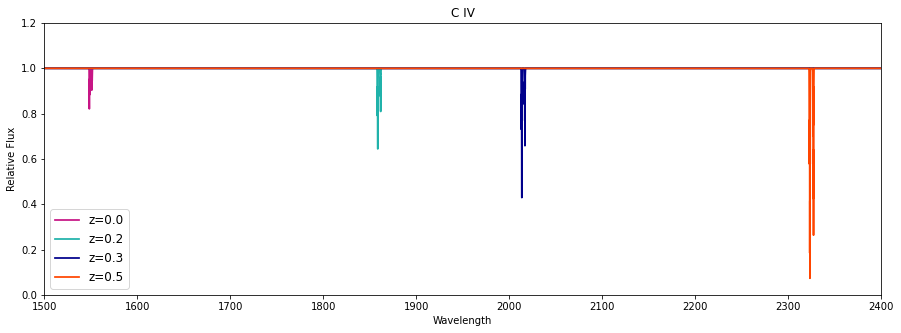

In [94]:
plt.figure(figsize=(15,5))
plt.plot(r0[0], r0[1], color='mediumvioletred', label = "z=0.0", linewidth=1.75)
plt.plot(r1[0], r1[1], color='lightseagreen', label = "z=0.2", linewidth=1.75)
plt.plot(r2[0], r2[1], color='darkblue', label = "z=0.3", linewidth=1.75)
plt.plot(r3[0], r3[1], color='orangered', label = "z=0.5", linewidth=1.75)
plt.xlim(1500, 2400)
plt.title('C IV')
plt.legend(fontsize='large')
plt.ylim(0, 1.2)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

Text(1559, 0.8, 'Offset: -300')

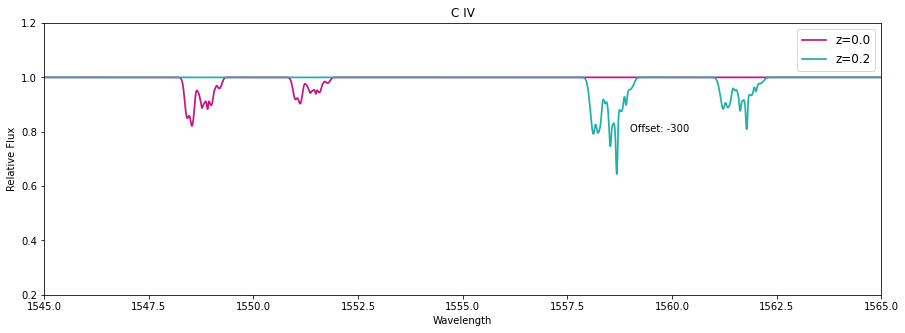

In [102]:
plt.figure(figsize=(15,5))
plt.plot(r0[0], r0[1], color='mediumvioletred', label = "z=0.0", linewidth=1.75)
plt.plot(r1[0]-300, r1[1], color='lightseagreen', label = "z=0.2", linewidth=1.75)
plt.xlim(1545, 1565)
plt.title('C IV')
plt.legend(fontsize='large')
plt.ylim(0.2, 1.2)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')
plt.text(1559, 0.8, 'Offset: -300')

Pros: Spectra is redshifted

Cons: deeps and shallows flip

### Observing Redshift

I used the same z values to check whether or not it is the same as redshifting the ray

In [48]:
b0 = spec_obr(0, .65, .5, 2, .65, .5, 4, 2, 'C IV', 1000, 3000, 0, 'spec.txt')
b1 = spec_obr(0, .65, .5, 2, .65, .5, 4, 2, 'C IV', 1000, 3000, 0.2, 'spec1.txt')
b2 = spec_obr(0, .65, .5, 2, .65, .5, 4, 2, 'C IV', 1000, 3000, 0.3, 'spec2.txt')
b3 = spec_obr(0, .65, .5, 2, .65, .5, 4, 2, 'C IV', 1000, 3000, 0.5, 'spec3.txt')

yt : [INFO     ] 2021-10-29 13:58:00,938 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-10-29 13:58:00,942 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2021-10-29 13:58:02,476 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 13:58:02,599 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 13:58:02,600 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 13:58:02,601 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 13:58:02,602 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_leng

yt : [INFO     ] 2021-10-29 13:58:25,916 Getting segment at z = 0.0: [0.         0.32890625 0.25195312] unitary to [1.         0.32890625 0.25195312] unitary.
yt : [INFO     ] 2021-10-29 13:58:25,918 Getting subsegment: [0.0 unitary, 0.32890625 unitary, 0.251953125 unitary] to [1.0 unitary, 0.32890625 unitary, 0.251953125 unitary].
yt : [INFO     ] 2021-10-29 13:58:27,128 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 13:58:27,260 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 13:58:27,261 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 13:58:27,261 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 13:58:27,263 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_length
yt : [INFO     ] 2021-10-29 13:58:27,264 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 13:58:27,267 Setting instrument to Custom
yt : [INFO   

yt : [INFO     ] 2021-10-29 13:58:51,587 Getting subsegment: [0.0 unitary, 0.326953125 unitary, 0.25 unitary] to [1.0 unitary, 0.326953125 unitary, 0.25 unitary].
yt : [INFO     ] 2021-10-29 13:58:52,764 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 13:58:52,884 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 13:58:52,885 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 13:58:52,886 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 13:58:52,887 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_length
yt : [INFO     ] 2021-10-29 13:58:52,888 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 13:58:52,891 Setting instrument to Custom
yt : [INFO     ] 2021-10-29 13:58:52,907 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-10-29 13:58:52,916 Identified 2.490e+02 octs
yt : [INFO   

yt : [INFO     ] 2021-10-29 13:59:17,688 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 13:59:17,812 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 13:59:17,813 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 13:59:17,813 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 13:59:17,815 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_length
yt : [INFO     ] 2021-10-29 13:59:17,816 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 13:59:17,819 Setting instrument to Custom
yt : [INFO     ] 2021-10-29 13:59:17,835 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-10-29 13:59:17,845 Identified 2.490e+02 octs
yt : [INFO     ] 2021-10-29 13:59:17,999 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-10-29 13:59:18,007 Creating spectrum
A

yt : [INFO     ] 2021-10-29 13:59:43,429 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 13:59:43,430 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_length
yt : [INFO     ] 2021-10-29 13:59:43,430 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 13:59:43,433 Setting instrument to Custom
yt : [INFO     ] 2021-10-29 13:59:43,449 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-10-29 13:59:43,455 Identified 2.490e+02 octs
yt : [INFO     ] 2021-10-29 13:59:43,607 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-10-29 13:59:43,615 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3108.42it/s]
yt : [INFO     ] 2021-10-29 13:59:44,000 Writing spectrum to ascii file: spec2.txt.
yt : [INFO     ] 2021-10-29 13:59:46,823 Getting segment at z = 0.0: [0.         0.32890

yt : [INFO     ] 2021-10-29 14:00:09,026 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 14:00:09,029 Setting instrument to Custom
yt : [INFO     ] 2021-10-29 14:00:09,044 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-10-29 14:00:09,051 Identified 2.490e+02 octs
yt : [INFO     ] 2021-10-29 14:00:09,227 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-10-29 14:00:09,235 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 3253.58it/s]
yt : [INFO     ] 2021-10-29 14:00:09,625 Writing spectrum to ascii file: spec3.txt.
yt : [INFO     ] 2021-10-29 14:00:12,610 Getting segment at z = 0.0: [0.         0.32695313 0.25      ] unitary to [1.         0.32695313 0.25      ] unitary.
yt : [INFO     ] 2021-10-29 14:00:12,611 Getting subsegment: [0.0 unitary, 0.326953125 unitary, 0.25 unitary] to [1.0 unitary, 0.326953125 unitary, 0.25 unitary]

yt : [INFO     ] 2021-10-29 14:00:34,952 Identified 2.490e+02 octs
yt : [INFO     ] 2021-10-29 14:00:35,147 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-10-29 14:00:35,158 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 2951.65it/s]
yt : [INFO     ] 2021-10-29 14:00:35,561 Writing spectrum to ascii file: spec3.txt.
yt : [INFO     ] 2021-10-29 14:00:38,539 Getting segment at z = 0.0: [0.         0.33085938 0.25195312] unitary to [1.         0.33085938 0.25195312] unitary.
yt : [INFO     ] 2021-10-29 14:00:38,541 Getting subsegment: [0.0 unitary, 0.33085937500000007 unitary, 0.251953125 unitary] to [1.0 unitary, 0.33085937500000007 unitary, 0.251953125 unitary].
yt : [INFO     ] 2021-10-29 14:00:39,786 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 14:00:39,906 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 14:00:39,906 Parameter

Text(2000, 1.03, 'Ray Redshift Spectra')

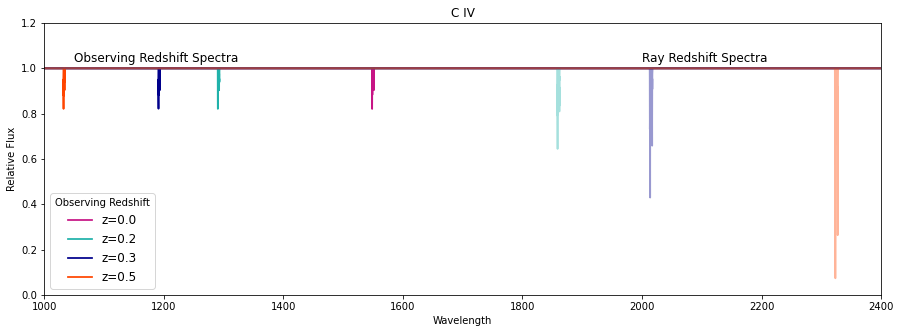

In [109]:
plt.figure(figsize=(15,5))
plt.plot(b0[0], b0[1], color='mediumvioletred', label = "z=0.0", linewidth=1.75)
plt.plot(b1[0], b1[1], color='lightseagreen', label = "z=0.2", linewidth=1.75)
plt.plot(b2[0], b2[1], color='darkblue', label = "z=0.3", linewidth=1.75)
plt.plot(b3[0], b3[1], color='orangered', label = "z=0.5", linewidth=1.75)
plt.plot(r0[0], r0[1], color='mediumvioletred', linewidth=1.75, alpha=0.4)
plt.plot(r1[0], r1[1], color='lightseagreen', linewidth=1.75, alpha=0.4)
plt.plot(r2[0], r2[1], color='darkblue', linewidth=1.75, alpha=0.4)
plt.plot(r3[0], r3[1], color='orangered',linewidth=1.75, alpha=0.4)
plt.xlim(1000, 2400)
plt.title('C IV')
plt.legend(fontsize='large', title='Observing Redshift')
plt.ylim(0, 1.2)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')
plt.text(1050, 1.03, 'Observing Redshift Spectra', fontsize=12)
plt.text(2000, 1.03, 'Ray Redshift Spectra', fontsize=12)

Observing Redshift is actually "blueshifting" in this case because the function changes your observing redshift, which is typically 0. 

Example:
Source has z = 2 but you want to pretend to observe it from z_ob = 1 instead of 0 so that's when you use this function.

Text(1540.8, 0.86, 'Offset: +250')

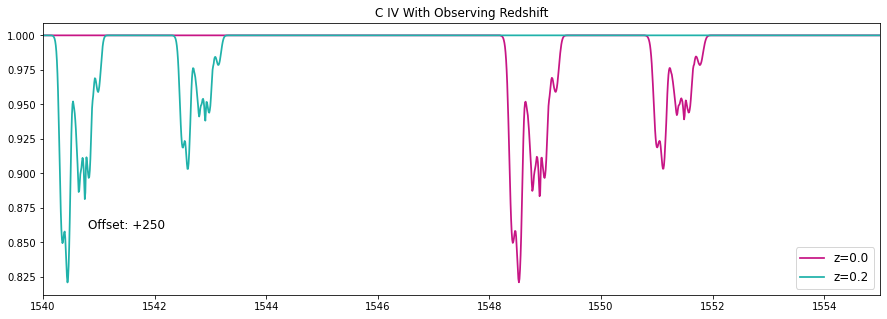

In [111]:
plt.figure(figsize=(15,5))
plt.plot(b0[0], b0[1], color='mediumvioletred', label = "z=0.0", linewidth=1.75)
plt.plot(b1[0]+250, b1[1], color='lightseagreen', label = "z=0.2", linewidth=1.75)
plt.xlim(1540, 1555)
plt.legend(fontsize='large')
plt.title('C IV With Observing Redshift')
plt.text(1540.8, 0.860, 'Offset: +250', fontsize=12)

Pros: deep shallow, deep shallow

Cons: Actually Blueshifted

yt : [INFO     ] 2021-10-29 14:59:43,077 Getting segment at z = 0.0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-10-29 14:59:43,086 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2021-10-29 14:59:45,659 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 14:59:45,905 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 14:59:45,906 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 14:59:45,907 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 14:59:45,913 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_leng

yt : [INFO     ] 2021-10-29 15:00:22,408 Getting segment at z = 0.0: [0.         0.32890625 0.25195312] unitary to [1.         0.32890625 0.25195312] unitary.
yt : [INFO     ] 2021-10-29 15:00:22,411 Getting subsegment: [0.0 unitary, 0.32890625 unitary, 0.251953125 unitary] to [1.0 unitary, 0.32890625 unitary, 0.251953125 unitary].
yt : [INFO     ] 2021-10-29 15:00:24,265 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 15:00:24,497 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 15:00:24,498 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 15:00:24,499 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 15:00:24,508 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_length
yt : [INFO     ] 2021-10-29 15:00:24,513 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 15:00:24,521 Setting instrument to Custom
yt : [INFO   

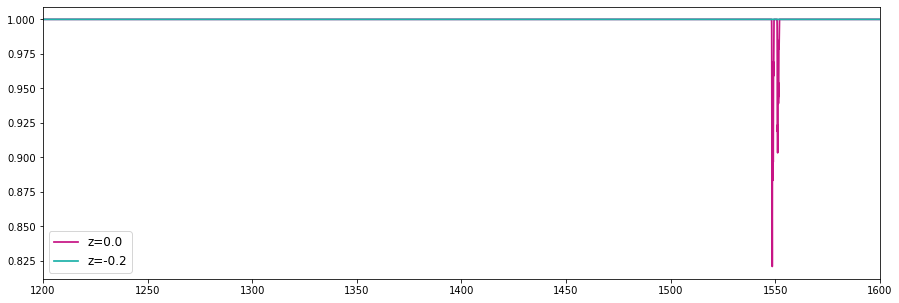

In [78]:
b4 = spec_obr(0, .65, .5, 2, .65, .5, 4, 2, 'C IV', 1000, 3000, -0.2, 'spec4.txt')

Text(1566, 0.86, 'Offset: -370')

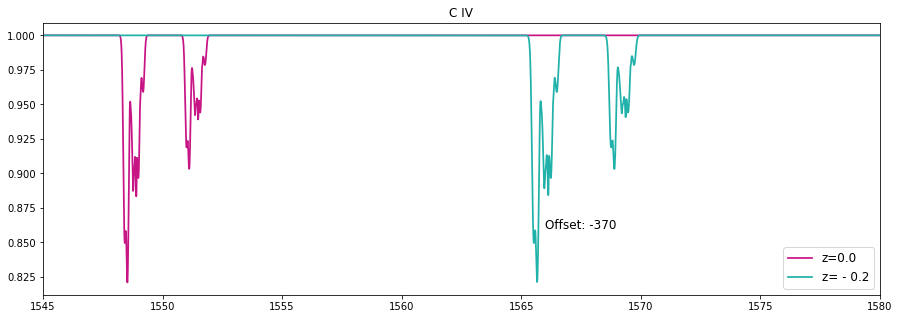

In [114]:
plt.figure(figsize=(15,5))
plt.plot(b0[0], b0[1], color='mediumvioletred', label = "z=0.0", linewidth=1.75)
plt.plot(b4[0]-370, b4[1], color='lightseagreen', label = "z= - 0.2", linewidth=1.75)
plt.xlim(1545, 1580)
plt.title('C IV')
plt.legend(fontsize='large')
plt.text(1566, 0.860, 'Offset: -370', fontsize=12)

Negative z results in redshift & deep shallow, deep shallow

### Ray & Observing Redshift in Each Spectra

In [60]:
a0 = spec_both(0, .65, .5, 2, .65, .5, 4, 2, 'C IV', 1000, 3000, 0, 'spec.txt')
a1 = spec_both(0, .65, .5, 2, .65, .5, 4, 2, 'C IV', 1000, 3000, 0.2, 'spec1.txt')
a2 = spec_both(0, .65, .5, 2, .65, .5, 4, 2, 'C IV', 1000, 3000, 0.3, 'spec2.txt')
a3 = spec_both(0, .65, .5, 2, .65, .5, 4, 2, 'C IV', 1000, 3000, 0.5, 'spec3.txt')

yt : [INFO     ] 2021-10-29 14:33:32,147 Getting segment at z = 0: [0.    0.325 0.25 ] unitary to [1.    0.325 0.25 ] unitary.
/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2021-10-29 14:33:32,161 Getting subsegment: [0.0 unitary, 0.32500000000000007 unitary, 0.25 unitary] to [1.0 unitary, 0.32500000000000007 unitary, 0.25 unitary].
yt : [INFO     ] 2021-10-29 14:33:34,085 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 14:33:34,312 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 14:33:34,312 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 14:33:34,314 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 14:33:34,320 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_length

yt : [INFO     ] 2021-10-29 14:34:15,375 Getting subsegment: [0.0 unitary, 0.32890625 unitary, 0.251953125 unitary] to [1.0 unitary, 0.32890625 unitary, 0.251953125 unitary].
yt : [INFO     ] 2021-10-29 14:34:16,988 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 14:34:17,189 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 14:34:17,189 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 14:34:17,190 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 14:34:17,191 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_length
yt : [INFO     ] 2021-10-29 14:34:17,194 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 14:34:17,198 Setting instrument to Custom
yt : [INFO     ] 2021-10-29 14:34:17,238 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-10-29 14:34:17,264 Identified 2.490e+02 octs
y

yt : [INFO     ] 2021-10-29 14:34:54,168 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 14:34:54,331 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 14:34:54,332 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 14:34:54,332 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 14:34:54,333 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_length
yt : [INFO     ] 2021-10-29 14:34:54,335 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 14:34:54,338 Setting instrument to Custom
yt : [INFO     ] 2021-10-29 14:34:54,372 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-10-29 14:34:54,393 Identified 2.490e+02 octs
yt : [INFO     ] 2021-10-29 14:34:54,718 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-10-29 14:34:54,731 Creating spectrum
A

yt : [INFO     ] 2021-10-29 14:35:33,670 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 14:35:33,670 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 14:35:33,671 Parameters: domain_right_edge         = [1.2344e+23 6.1720e+22 6.1720e+22] code_length
yt : [INFO     ] 2021-10-29 14:35:33,673 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 14:35:33,679 Setting instrument to Custom
yt : [INFO     ] 2021-10-29 14:35:33,710 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-10-29 14:35:33,717 Identified 2.490e+02 octs
yt : [INFO     ] 2021-10-29 14:35:33,952 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-10-29 14:35:33,969 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1337.69it/s]
yt : [INFO     ] 2021-10-29 14:35:34,766 Writing spectrum to ascii file: spec1.txt.

yt : [INFO     ] 2021-10-29 14:36:21,868 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2021-10-29 14:36:21,877 Setting instrument to Custom
yt : [INFO     ] 2021-10-29 14:36:21,922 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-10-29 14:36:21,953 Identified 2.490e+02 octs
yt : [INFO     ] 2021-10-29 14:36:22,220 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-10-29 14:36:22,231 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1046.55it/s]
yt : [INFO     ] 2021-10-29 14:36:23,269 Writing spectrum to ascii file: spec2.txt.
yt : [INFO     ] 2021-10-29 14:36:26,989 Getting segment at z = 0.3: [0.         0.32890625 0.25195312] unitary to [1.         0.32890625 0.25195312] unitary.
yt : [INFO     ] 2021-10-29 14:36:26,990 Getting subsegment: [0.0 unitary, 0.32890625 unitary, 0.251953125 unitary] to [1.0 unitary, 0.32890625 unitary, 0.251953

yt : [INFO     ] 2021-10-29 14:37:01,901 Allocating for 5.120e+02 particles (index particle type 'all')
yt : [INFO     ] 2021-10-29 14:37:01,921 Identified 2.490e+02 octs
yt : [INFO     ] 2021-10-29 14:37:02,180 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2021-10-29 14:37:02,193 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 1091.34it/s]
yt : [INFO     ] 2021-10-29 14:37:03,251 Writing spectrum to ascii file: spec3.txt.
yt : [INFO     ] 2021-10-29 14:37:07,207 Getting segment at z = 0.5: [0.         0.32695313 0.25      ] unitary to [1.         0.32695313 0.25      ] unitary.
yt : [INFO     ] 2021-10-29 14:37:07,210 Getting subsegment: [0.0 unitary, 0.326953125 unitary, 0.25 unitary] to [1.0 unitary, 0.326953125 unitary, 0.25 unitary].
yt : [INFO     ] 2021-10-29 14:37:08,981 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 14:37:09,166 Parameters: current_time      

yt : [INFO     ] 2021-10-29 14:37:37,773 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 512/512 [00:00<00:00, 919.45it/s]
yt : [INFO     ] 2021-10-29 14:37:38,947 Writing spectrum to ascii file: spec3.txt.
yt : [INFO     ] 2021-10-29 14:37:42,557 Getting segment at z = 0.5: [0.         0.33085938 0.25195312] unitary to [1.         0.33085938 0.25195312] unitary.
yt : [INFO     ] 2021-10-29 14:37:42,559 Getting subsegment: [0.0 unitary, 0.33085937500000007 unitary, 0.251953125 unitary] to [1.0 unitary, 0.33085937500000007 unitary, 0.251953125 unitary].
yt : [INFO     ] 2021-10-29 14:37:43,994 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-10-29 14:37:44,161 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2021-10-29 14:37:44,162 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-10-29 14:37:44,163 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2021-10-29 14:37:44,164 

Text(0, 0.5, 'Relative Flux')

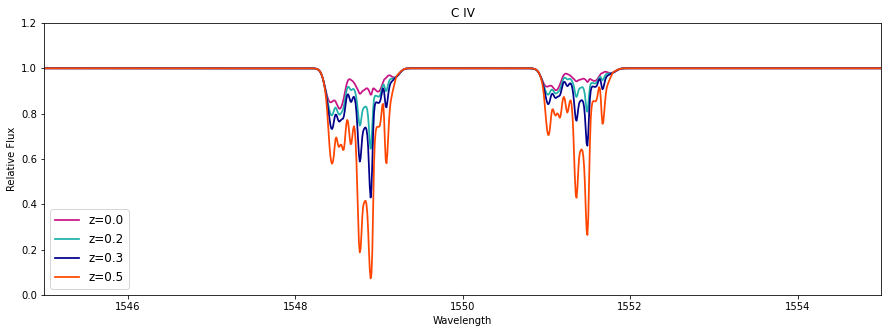

In [67]:
plt.figure(figsize=(15,5))
plt.plot(a0[0], a0[1], color='mediumvioletred', label = "z=0.0", linewidth=1.75)
plt.plot(a1[0], a1[1], color='lightseagreen', label = "z=0.2", linewidth=1.75)
plt.plot(a2[0], a2[1], color='darkblue', label = "z=0.3", linewidth=1.75)
plt.plot(a3[0], a3[1], color='orangered', label = "z=0.5", linewidth=1.75)
plt.xlim(1545, 1555)
plt.title('C IV')
plt.legend(fontsize='large')
plt.ylim(0, 1.2)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')

MAYBE: cell size increases with redshift so that's why the fluxes are different

Text(0, 0.5, 'Relative Flux')

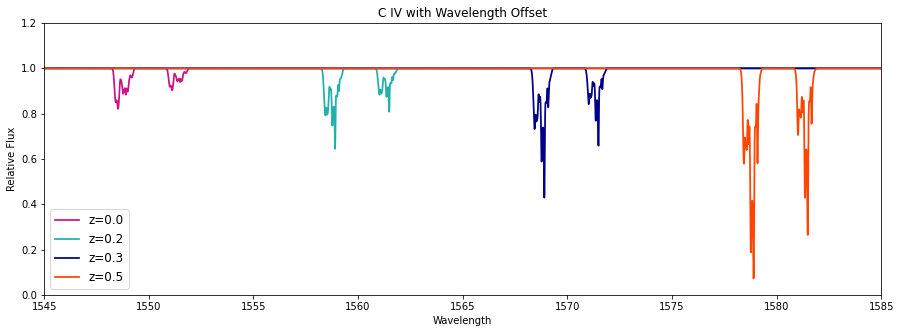

In [68]:
plt.figure(figsize=(15,5))
plt.plot(a0[0], a0[1], color='mediumvioletred', label = "z=0.0", linewidth=1.75)
plt.plot(a1[0]+10, a1[1], color='lightseagreen', label = "z=0.2", linewidth=1.75)
plt.plot(a2[0]+20, a2[1], color='darkblue', label = "z=0.3", linewidth=1.75)
plt.plot(a3[0]+30, a3[1], color='orangered', label = "z=0.5", linewidth=1.75)
plt.xlim(1545, 1585)
plt.title('C IV with Wavelength Offset')
plt.legend(fontsize='large')
plt.ylim(0, 1.2)
plt.xlabel('Wavelength')
plt.ylabel('Relative Flux')